In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

DB_PATH = "../data/outputs/oposiciones.db"
TABLE_NAME = "oposiciones"  # ← Cambia si tu tabla tiene otro nombre

con = sqlite3.connect(DB_PATH)
df = pd.read_sql_query(f"SELECT * FROM {TABLE_NAME}", con)

print(f"Filas cargadas: {len(df):,}")
df.head()

Filas cargadas: 1,463


,texto_original,titulo,organismo_que_convoca,titulacion_requerida,via,plazas_convocadas,plazas_libres,otras_plazas,fecha_de_publicacion,fecha_de_cierre,referencia
0,"\nGRADO UNIVERSITARIO. DOCTO-\nRADO, LICENCI...",no aplica,"consejería de economía, hacienda y empleo",técnicos superiores especialista conservación ...,ingreso libre,5,5,no aplica,2025-05-21,2025-06-18,214932
1,"\nPALAU DE LA MÚSICA, CONGRE-\nSOS Y ORQUEST...",percusionista,orquesta de la comunidad valencia,clarinete solista,contratación temporal,"bolsa de empleo, para la comunidad autónoma d...",no aplica,no aplica,2025-05-29,2025-06-12,215113
2,\nGRADO UNIVERSITARIO. DIPLOMA-\nTURA UNIVER...,no aplica,conseil insular de mallorca,"diploma-tura universitaria, ingeniería técnica...",ingreso libre,3,3,no aplica,2025-05-08,2025-06-20,215144
3,\nBACHILLERATO O TÉCNICO. BACHI-\nLLERATO UN...,policías locales,no aplica,bachillerato o técnico. bachillerato unificado...,interinidad,"bolsa de empleo, para la comunidad autónoma de...",no aplica,no aplica,2025-02-21,2026-02-24,213683
4,"\nCONSEJERÍA DE ECONOMÍA, HA-\nCIENDA, FONDO...",cuerpo técnico,consejería de economía hacienda fondos europeo...,opción prevención,ingreso libre,9,9,no aplica,2025-05-29,2025-06-27,215130


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   texto_original         1463 non-null   object
 1   titulo                 1457 non-null   object
 2   organismo_que_convoca  1457 non-null   object
 3   titulacion_requerida   1457 non-null   object
 4   via                    1457 non-null   object
 5   plazas_convocadas      1457 non-null   object
 6   plazas_libres          1457 non-null   object
 7   otras_plazas           1461 non-null   object
 8   fecha_de_publicacion   1457 non-null   object
 9   fecha_de_cierre        1457 non-null   object
 10  referencia             1457 non-null   object
dtypes: object(11)
memory usage: 125.9+ KB


In [20]:
df.describe(include='all').T

,count,unique,top,freq
texto_original,1463,680,\nNIVEL DE FORMACIÓN EQUIVALENTE A EDUCACIÓN...,3
titulo,1457,308,no aplica,63
organismo_que_convoca,1457,159,ministerio de defensa,122
titulacion_requerida,1457,329,no aplica,482
via,1457,31,ingreso libre,409
plazas_convocadas,1457,115,1,446
plazas_libres,1457,77,1,450
otras_plazas,1461,47,no aplica,1180
fecha_de_publicacion,1457,107,2025-05-13,166
fecha_de_cierre,1457,42,2025-06-05,168


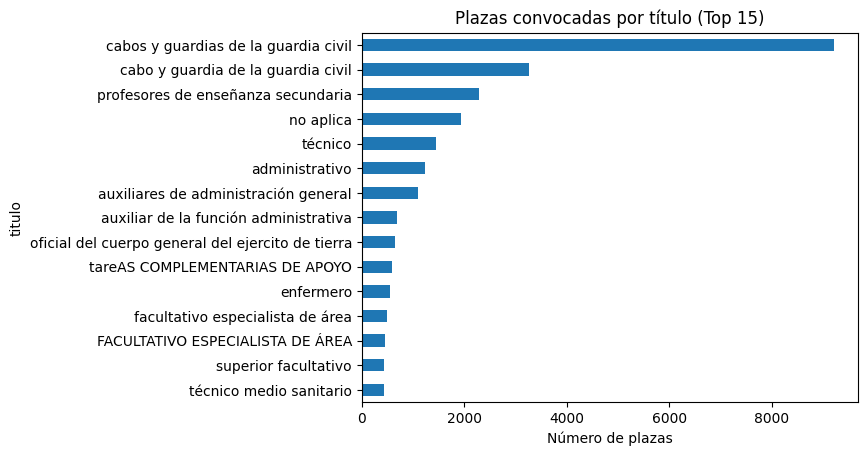

In [21]:
df['plazas_convocadas'] = df['plazas_convocadas'].str.extract('(\d+)', expand=False).astype('float')
top_titles = (df.groupby('titulo')['plazas_convocadas']
                .sum()
                .sort_values(ascending=False)
                .head(15))

top_titles.plot(kind='barh')
plt.title('Plazas convocadas por título (Top 15)')
plt.xlabel('Número de plazas')
plt.gca().invert_yaxis()
plt.show()

In [22]:
top_titles

titulo
cabos y guardias de la guardia civil                 9212.0
cabo y guardia de la guardia civil                   3260.0
profesores de enseñanza secundaria                   2290.0
no aplica                                            1939.0
técnico                                              1447.0
administrativo                                       1226.0
auxiliares de administración general                 1102.0
auxiliar de la función administrativa                 678.0
oficial del cuerpo general del ejercito de tierra     654.0
tareAS COMPLEMENTARIAS DE APOYO                       590.0
enfermero                                             548.0
facultativo especialista de área                      498.0
FACULTATIVO ESPECIALISTA DE ÁREA                      451.0
superior facultativo                                  431.0
técnico medio sanitario                               430.0
Name: plazas_convocadas, dtype: float64

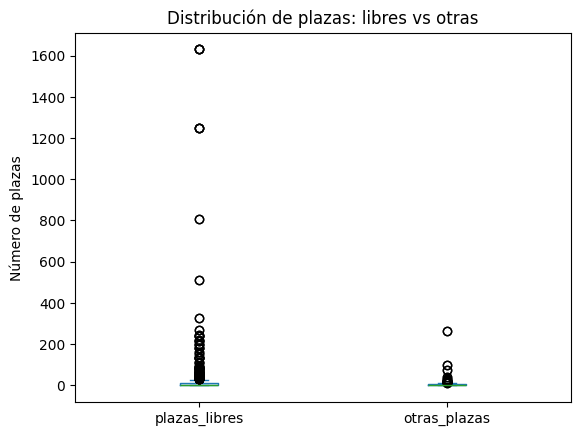

In [25]:
# Distribución de plazas libres y otras
df['plazas_libres'] = df['plazas_libres'].str.extract('(\d+)', expand=False).astype('float')
df['otras_plazas'] = df['otras_plazas'].str.extract('(\d+)', expand=False).astype('float')
df[['plazas_libres', 'otras_plazas']].plot(kind='box')
plt.title('Distribución de plazas: libres vs otras')
plt.ylabel('Número de plazas')
plt.show()

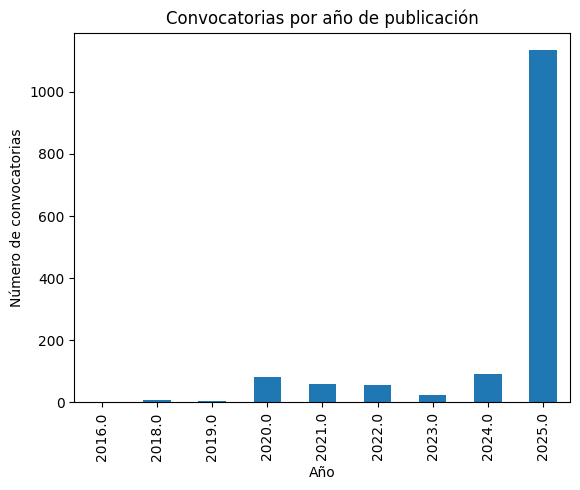

In [26]:
df['fecha_de_publicacion'] = pd.to_datetime(df['fecha_de_publicacion'], errors='coerce')
df['año_publicacion'] = df['fecha_de_publicacion'].dt.year

publicaciones_anuales = df['año_publicacion'].value_counts().sort_index()

publicaciones_anuales.plot(kind='bar')
plt.title('Convocatorias por año de publicación')
plt.xlabel('Año')
plt.ylabel('Número de convocatorias')
plt.show()

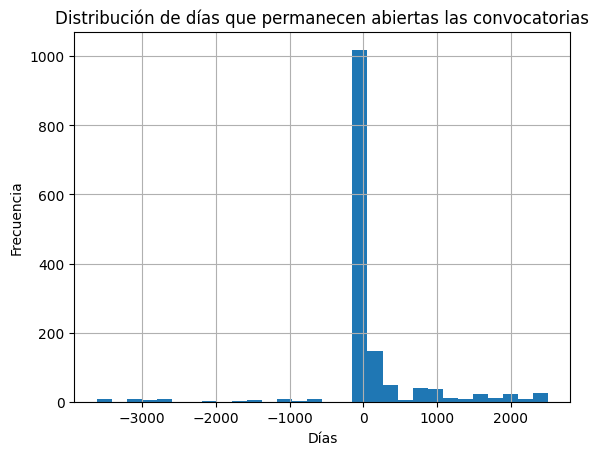

count    1455.000000
mean      141.784192
std       721.089410
min     -3612.000000
25%        14.000000
50%        28.000000
75%        65.000000
max      2500.000000
Name: dias_abierto, dtype: float64


In [27]:

df['fecha_de_cierre'] = pd.to_datetime(df['fecha_de_cierre'], errors='coerce')
df['dias_abierto'] = (df['fecha_de_cierre'] - df['fecha_de_publicacion']).dt.days

df['dias_abierto'].hist(bins=30)
plt.title('Distribución de días que permanecen abiertas las convocatorias')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()

print(df['dias_abierto'].describe())